In [1]:
%pip install nltk
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import os

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_train = pd.read_csv(r"C:\Users\HP\OneDrive - Azubi Africa\Desktop\P5\Train.csv")
df_test = pd.read_csv(r"C:\Users\HP\OneDrive - Azubi Africa\Desktop\P5\Test.csv")

In [4]:
df_train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [5]:
df_train.tail()

,tweet_id,safe_text,label,agreement
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0,1.000000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000
10000,P6190L3Q,Pneumonia vaccine: for women w risk of pulmona...,1.0,0.666667


In [6]:
df_test.head()

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."


In [7]:
df_test.shape

(5177, 2)

In [8]:
df_train.shape

(10001, 4)

###### *Data Cleaning and EDA*

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   5177 non-null   object
 1   safe_text  5176 non-null   object
dtypes: object(2)
memory usage: 81.0+ KB


###### *Missing Values*

In [11]:
nan_values = df_train.isnull().sum()

In [12]:
print(nan_values)

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64


In [13]:
missing_label = df_train[df_train['label'].isna()]
missing_agreement = df_train[df_train['agreement'].isna()]

In [14]:
missing_label.head()

,tweet_id,safe_text,label,agreement
4798,RQMQ0L2A,#lawandorderSVU,NaN,NaN


In [15]:
missing_agreement.head()

,tweet_id,safe_text,label,agreement
4798,RQMQ0L2A,#lawandorderSVU,NaN,NaN
4799,I cannot believe in this day and age some pare...,1,0.666667,NaN


In [16]:
df_train['label'].unique()

array([ 0.        ,  1.        , -1.        ,         nan,  0.66666667])

In [17]:
df_train['agreement'].unique()

array([1.        , 0.66666667, 0.33333333,        nan])

In [18]:
df_train['label'].fillna(method='bfill', inplace=True)
df_train['agreement'].fillna(method='bfill', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10468\2336867759.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_train[['tweet_id', 'label']].corr()


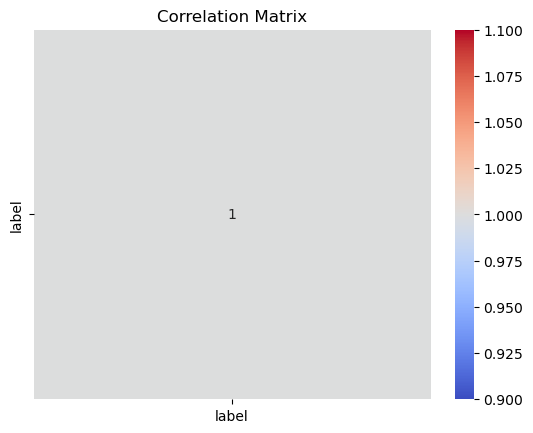

In [19]:
# Correlation Analysis
correlation = df_train[['tweet_id', 'label']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Agreement Analysis
agreement_distribution = df_train['agreement'].value_counts()
print("\nAgreement Distribution:")
print(agreement_distribution)


Agreement Distribution:
1.000000    5866
0.666667    3896
0.333333     239
Name: agreement, dtype: int64


In [21]:
# Droping unneccessary column
df_train.drop(['tweet_id'],axis=1, inplace=True)
df_train.head()

,safe_text,label,agreement
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,I mean if they immunize my kid with something ...,-1.0,1.0
4,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [22]:
df_train.columns =['text', 'sentiments', 'agreements']

<Axes: xlabel='sentiments', ylabel='Count'>

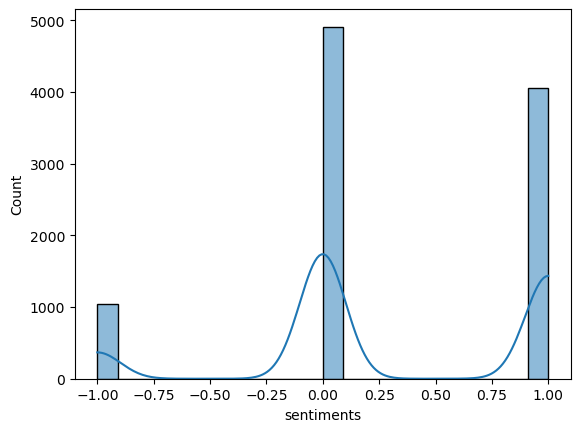

In [23]:
#Let's see some 
sns.histplot(df_train['sentiments'], kde=True)

<Axes: xlabel='sentiments', ylabel='count'>

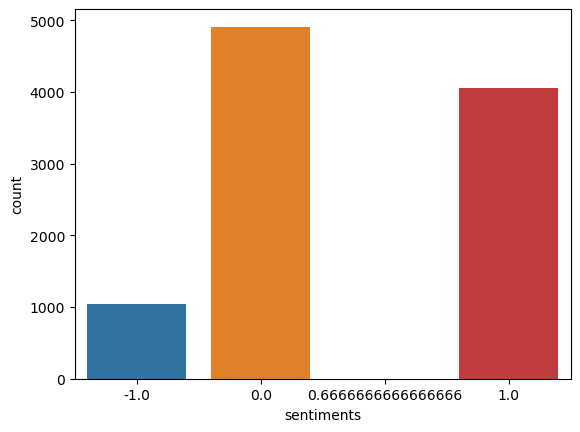

In [24]:
sns.countplot(x=df_train['sentiments'])

###### *Text Preprocessing*

In [25]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df_train['text'].tolist()
print(len(corpus))
print(corpus[0])

10001
Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>


In [26]:
final_corpus = []
final_corpus_joined = []
for i in df_train.index:
    text = re.sub('[^a-zA-Z]', ' ', df_train['text'][i])
    text = text.lower()
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    text=re.sub("(\\d|\\W)+"," ",text)
    text = text.split()
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [27]:
data_cleaned = pd.DataFrame()
data_cleaned['text'] = final_corpus_joined
data_cleaned["sentiments"] = df_train["sentiments"].values

In [28]:
data_cleaned

,text,sentiments
0,amp big homi meanboy meanboy mb mbs mmr stegma...,0.0
1,think devot career prove autism caus vaccin du...,1.0
2,whatcausesaut vaccin vaccin child,-1.0
3,mean immun kid someth secret kill year line trust,-1.0
4,thank user catch perform la nuit nyc st ave sh...,0.0
...,...,...
9996,live time sperm use wast jenni mccarthi better...,1.0
9997,user user spite measl outbreak judg mi threate...,1.0
9998,interest trend child immun oklahoma user cover...,0.0
9999,cdc say measl highest level decad url return u...,0.0


In [29]:
#This df is created for wordcloud only
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiments'] = df_train['sentiments'].values
data_eda.head()

,text,sentiments
0,"[amp, big, homi, meanboy, meanboy, mb, mbs, mm...",0.0
1,"[think, devot, career, prove, autism, caus, va...",1.0
2,"[whatcausesaut, vaccin, vaccin, child]",-1.0
3,"[mean, immun, kid, someth, secret, kill, year,...",-1.0
4,"[thank, user, catch, perform, la, nuit, nyc, s...",0.0


###### *WORLD CLOUND*

In [30]:
positive = data_eda[data_eda['sentiments'] == 1]
positive_list = positive['text'].tolist()
negative = data_eda[data_eda['sentiments'] == -1]
negative_list = negative['text'].tolist()

In [31]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

###### *FOR POSITIVE*

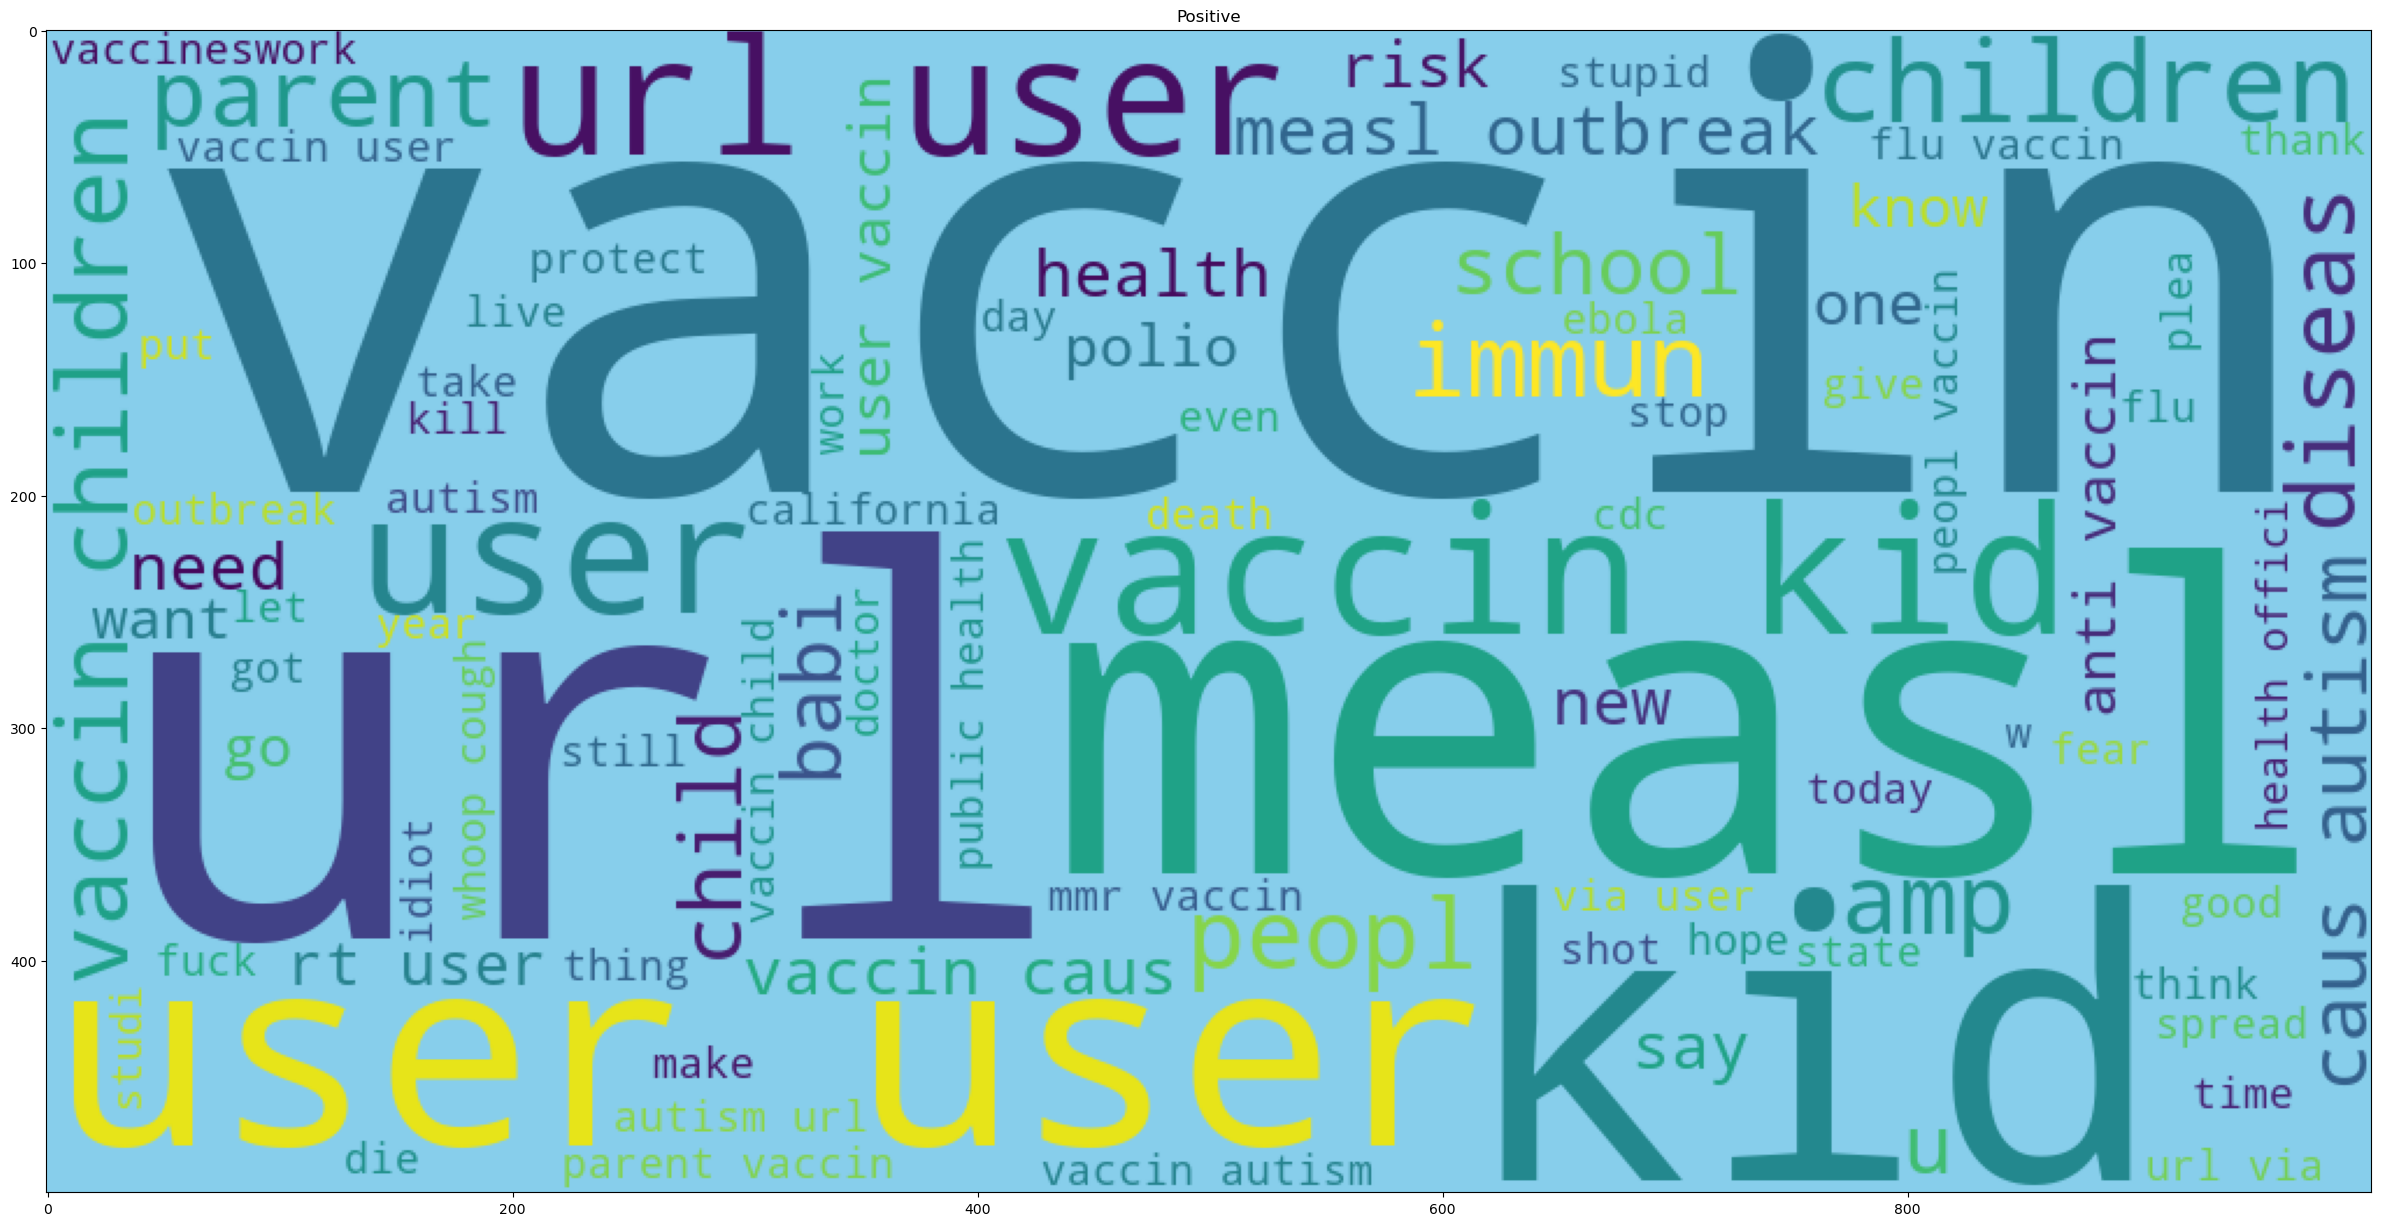

In [32]:
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

###### *FOR NEGATIVE*

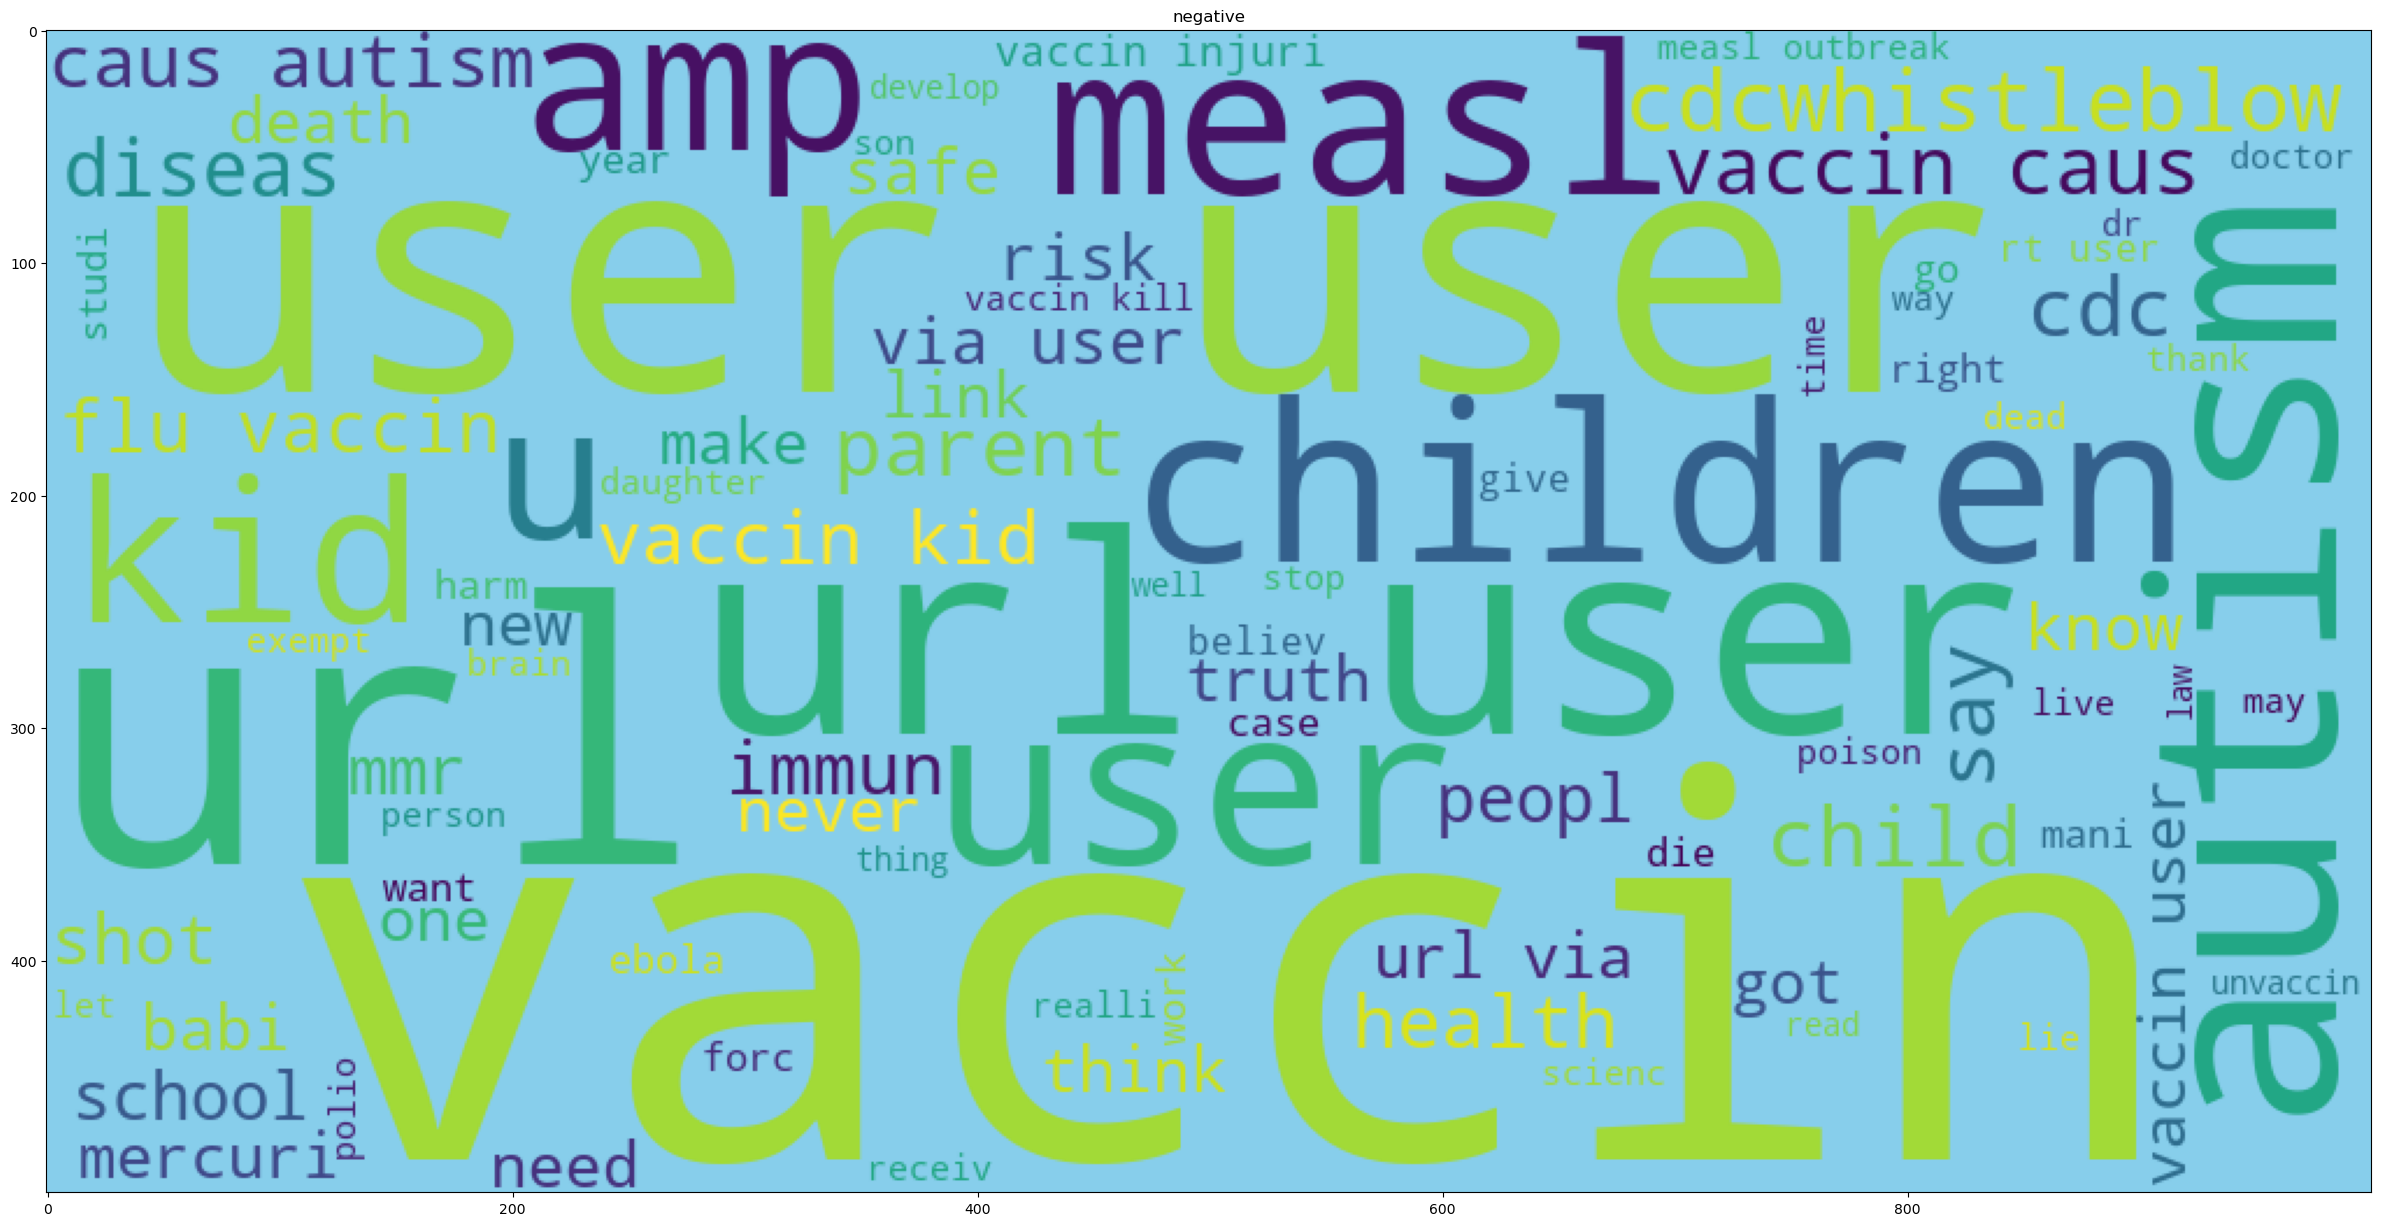

In [33]:
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_all)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

###### *Model Building*